In [1]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.Logistic_regression import *
from Functions.Models.evaluation import *

## Connection to databse

In [2]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
105


## Data cleaning

In [3]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#merge duplicated entity
entity_duplicated(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

## Creating new columns for features 

In [4]:
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
speciality(alertP1)
alertP1=unit(alertP1)
alertP1=alertP1.sort_values('DATA_RECEPCAO')
alertP1

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,resume saída,mês_saida,ano_saida,Texto,result,area,text_length,step,speciality_type,unit
9915,SEAFHB,BBLVVLDC,LOHHHLOV,SFGHADG,3150305,UCSP RAINHA D. LEONOR,CS/USF,CTH,,unknown,...,30/03/2012,3,2012,,1,inside area,0,1,Other specialities,UCSP
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,unknown,,unknown,...,01/08/2012,8,2012,,1,outside area,0,1,General Neurology,HGO
6542,ZZZBGG,BMJIBILB,LOHHHOHO,SSBSEGA,3150301,FRANCISCO X NORONHA,CS/USF,CTH,,unknown,...,10/01/2012,1,2012,,0,outside area,0,1,General Neurology,UCSP
3067,DSHCGG,BMIBJIE,LOHHHOUQ,SFAAECF,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,unknown,...,12/03/2012,3,2012,,1,inside area,0,1,Other specialities,USF
2078,AESBSC,NINBJJC,LOHHHPTO,,0,,OUTRA,unknown,,unknown,...,22/01/2013,1,2013,,1,outside area,0,1,General Neurology,HGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,ZSGCCF,BMJCJLIJ,LSHVLHUO,ZEFHCECF,3150672,USF FEIJO-CS COVA DA PIEDADE,CS/USF,CTH,3,Normal,...,20/03/2017,3,2017,,1,inside area,0,2,General Neurology,USF
4044,CDABCC,VLNVILNB,LSHVLLUO,ZEFZDDBB,3150371,USF S JOAO DO PRAGAL-CS ALMADA,CS/USF,CTH,3,Normal,...,21/03/2017,3,2017,,1,inside area,0,1,General Neurology,USF
6424,FCDEF,BIJIMMIJ,LSHVLOQU,,0,,OUTRA,SAM,3,Normal,...,01/03/2018,3,2018,,1,outside area,0,2,Other specialities,HGO
9425,EBESGE,BDVDJJIB,LSHVLLVV,,0,,OUTRA,SAM,,unknown,...,04/09/2017,9,2017,,1,outside area,0,1,Other specialities,HGO


## structured data with dummies

In [5]:
data=structured_data_dummies(alertP1)
print(data.columns)
data

Index([          'ID_DOENTE',            'PROCESSO',      'COD_REFERENCIA',
                    'COD_PZ', 'COD_UNID_SAUDE_PROV',           'UNID_PROV',
                 'TIPO_UNID',       'COD_CTH_PRIOR',           'CTH_PRIOR',
         'COD_MOTIVO_RECUSA',   'DES_MOTIVO_RECUSA',   'COD_ESPECIALIDADE',
         'DES_ESPECIALIDADE',          'agrupadora',      'OUTRA_ENTIDADE',
             'DATA_RECEPCAO',          'DATA_ENVIO',        'DATA_RETORNO',
                  'NUM_TAXA',              'ESTADO',       'DATA_MARCACAO',
           'DATA_REALIZACAO',         'OBSERVACOES',         'Mês_entrada',
               'Ano_entrada',   'trata data recusa',        'resume saída',
                 'mês_saida',           'ano_saida',               'Texto',
                    'result',         'text_length',        'outside area',
                       'SAM',                 'SON',             'unknown',
        'Other specialities',                     2,                  '3+',
            

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,outside area,SAM,SON,unknown,Other specialities,2,3+,HOSP,UCSP,USF
9915,SEAFHB,BBLVVLDC,LOHHHLOV,SFGHADG,3150305,UCSP RAINHA D. LEONOR,CS/USF,,unknown,0,...,0,0,0,0,1,0,0,0,1,0
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,,unknown,0,...,1,0,0,1,0,0,0,0,0,0
6542,ZZZBGG,BMJIBILB,LOHHHOHO,SSBSEGA,3150301,FRANCISCO X NORONHA,CS/USF,,unknown,7,...,1,0,0,0,0,0,0,0,1,0
3067,DSHCGG,BMIBJIE,LOHHHOUQ,SFAAECF,3151672,USF AMORA SAUDAVEL,CS/USF,,unknown,0,...,0,0,0,0,1,0,0,0,0,1
2078,AESBSC,NINBJJC,LOHHHPTO,,0,,OUTRA,,unknown,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,ZSGCCF,BMJCJLIJ,LSHVLHUO,ZEFHCECF,3150672,USF FEIJO-CS COVA DA PIEDADE,CS/USF,3,Normal,0,...,0,0,0,0,0,1,0,0,0,1
4044,CDABCC,VLNVILNB,LSHVLLUO,ZEFZDDBB,3150371,USF S JOAO DO PRAGAL-CS ALMADA,CS/USF,3,Normal,0,...,0,0,0,0,0,0,0,0,0,1
6424,FCDEF,BIJIMMIJ,LSHVLOQU,,0,,OUTRA,3,Normal,0,...,1,1,0,0,1,1,0,0,0,0
9425,EBESGE,BDVDJJIB,LSHVLLVV,,0,,OUTRA,,unknown,0,...,1,1,0,0,1,0,0,0,0,0


## Logistic regression for all dataset

features and coefficients

In [6]:
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['text_length','ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df


,Feature,coefficients
0,outside area,-0.437860
1,SAM,-0.284898
2,SON,-1.730178
3,unknown,-1.251461
4,Other specialities,3.552115
5,2,0.243262
6,3+,-0.203410
7,HOSP,-1.043044
8,UCSP,0.078894
9,USF,0.528773


In [7]:
y_df = pd.DataFrame(y_test)
distribution = y_df["result"].value_counts()
distribution

1    1317
0     558
Name: result, dtype: int64

metrics

Accuracy: 0.7136
Recall: 0.5343094030910917
Precision: 0.6735104669887279
              precision    recall  f1-score   support

     refused       0.63      0.09      0.16       558
    accepted       0.72      0.98      0.83      1317

    accuracy                           0.71      1875
   macro avg       0.67      0.53      0.49      1875
weighted avg       0.69      0.71      0.63      1875



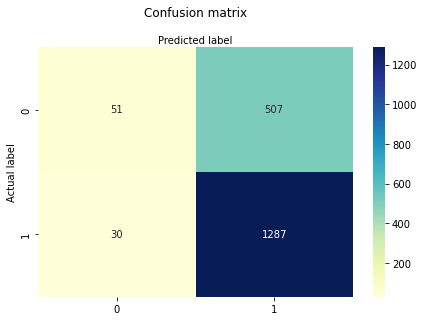

In [8]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

p value

In [9]:
p_value(X,y)

,Feature,p_value
0,outside area,0.000000e+00
1,SAM,2.518123e-14
2,SON,0.000000e+00
3,unknown,0.000000e+00
4,Other specialities,0.000000e+00
5,2,2.934509e-08
6,3+,1.456288e-01
7,HOSP,3.012792e-43
8,UCSP,8.111851e-03
9,USF,0.000000e+00


## Logistic regression text variables

In [10]:
#logistic regression text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df


c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,coefficients
0,text_length,0.001534
1,outside area,0.765245
2,SAM,-0.417095
3,SON,-0.298652
4,unknown,-1.302700
5,Other specialities,3.130859
6,2,0.192218
7,3+,-0.081257
8,HOSP,-0.637550
9,UCSP,0.560873


In [11]:
y_df = pd.DataFrame(y_test)
distribution = y_df["result"].value_counts()
distribution

1    211
0    111
Name: result, dtype: int64

metrics

Accuracy: 0.7018633540372671
Recall: 0.5867810938900986
Precision: 0.7131173324944952
              precision    recall  f1-score   support

     refused       0.73      0.22      0.33       111
    accepted       0.70      0.96      0.81       211

    accuracy                           0.70       322
   macro avg       0.71      0.59      0.57       322
weighted avg       0.71      0.70      0.64       322



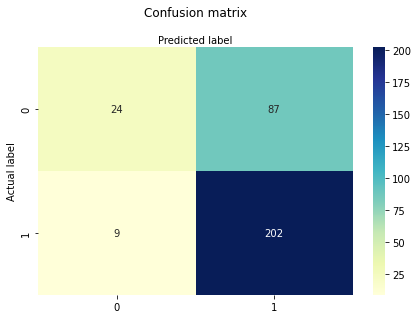

In [12]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

In [13]:
p_value(X,y)

,Feature,p_value
0,text_length,1.491237e-30
1,outside area,1.106719e-27
2,SAM,1.051842e-04
3,SON,7.611581e-04
4,unknown,2.499057e-31
5,Other specialities,4.704782e-23
6,2,4.632841e-02
7,3+,1.193271e-01
8,HOSP,4.905531e-04
9,UCSP,2.118621e-01


## Logistic without high p-value

In [14]:
#logistic regression text rows
data_no_text=data[data['text_length']>0]
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','UCSP','3+']
X = data_no_text.drop(eliminate_cols,axis=1)# Features
y = data_no_text.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df

c:\Users\MarouanKamoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,coefficients
0,text_length,0.001564
1,outside area,0.256150
2,SAM,-0.349275
3,SON,-0.208880
4,unknown,-1.241855
5,Other specialities,3.263052
6,2,0.090055
7,HOSP,-0.425346
8,USF,0.538828


Accuracy: 0.6894409937888198
Recall: 0.5623585670979037
Precision: 0.7123745819397993
              precision    recall  f1-score   support

     refused       0.74      0.15      0.25       111
    accepted       0.69      0.97      0.80       211

    accuracy                           0.69       322
   macro avg       0.71      0.56      0.53       322
weighted avg       0.70      0.69      0.61       322



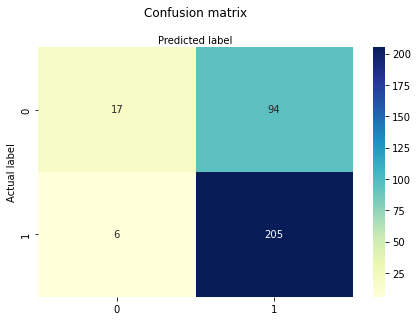

In [15]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))


In [16]:
p_value(X,y)


,Feature,p_value
0,text_length,1.491237e-30
1,outside area,1.106719e-27
2,SAM,1.051842e-04
3,SON,7.611581e-04
4,unknown,2.499057e-31
5,Other specialities,4.704782e-23
6,2,4.632841e-02
7,HOSP,4.905531e-04
8,USF,7.422429e-29
